In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv("Rural_Population_Dynamics.csv", skiprows=4)

In [3]:
# Data Cleaning
# Drop unnecessary columns
data.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 66'], inplace=True)

In [4]:
# Data Exploration
# Summary statistics
summary_stats = data.describe()
# Save summary statistics to a file
with open('summary_statistics.txt', 'w') as f:
    f.write(summary_stats.to_string())


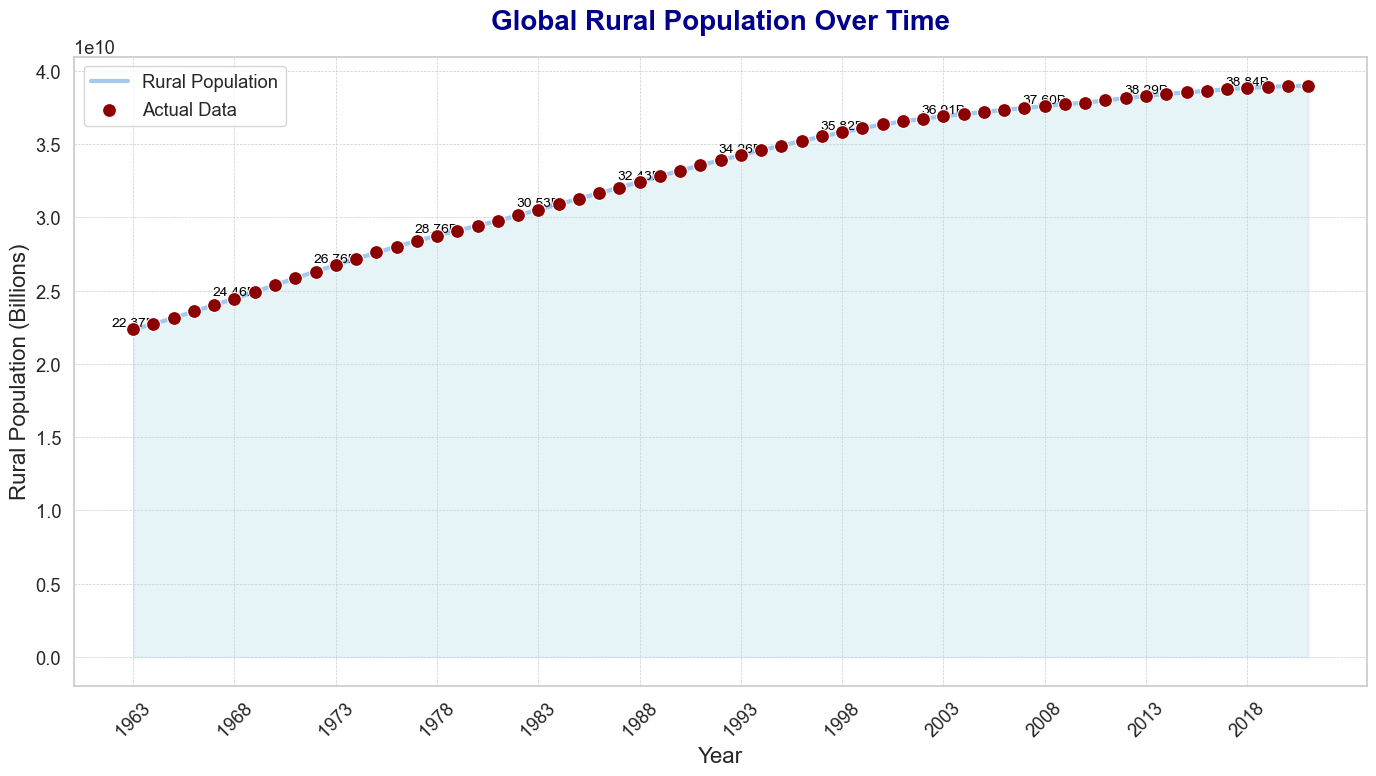

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def visualize_global_rural_population_over_time(data):
    """
    Visualizes the global trend of rural population over time with enhanced aesthetics.

    Args:
    - data: DataFrame containing rural population data across different years.
    """
    
    # Ensure the year columns are strings to match DataFrame column names
    years = data.columns[4:].astype(str)
    global_rural_population = data[years].sum()

    # Setting Seaborn style for improved aesthetics
    sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

    plt.figure(figsize=(14, 8))

    # Smoothing the line using numpy interpolation
    years_int = years.astype(int)
    smooth_years = np.linspace(years_int.min(), years_int.max(), 500)
    smooth_population = np.interp(smooth_years, years_int, global_rural_population)

    # Create a smooth line plot
    sns.lineplot(x=smooth_years, y=smooth_population, color='b', linewidth=3, label='Rural Population')

    # Adding scatter plot to emphasize actual data points
    sns.scatterplot(x=years_int, y=global_rural_population, color='darkred', s=100, label='Actual Data', zorder=5)

    plt.title('Global Rural Population Over Time', fontsize=20, weight='bold', color='darkblue', pad=20)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Rural Population (Billions)', fontsize=16)

    # Customize tick frequency and rotation
    plt.xticks(ticks=years_int[::5], labels=years_int[::5], rotation=45)

    # Adding annotations for key points
    for x, y in zip(years_int[::5], global_rural_population[::5]):
        plt.text(x, y, f'{y/1e9:.2f}B', ha='center', va='bottom', fontsize=10, color='black')

    # Extra aesthetics: adding a shaded background to the plot
    plt.fill_between(smooth_years, smooth_population, color='lightblue', alpha=0.3)

    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Call the function to visualize the plot
visualize_global_rural_population_over_time(data)


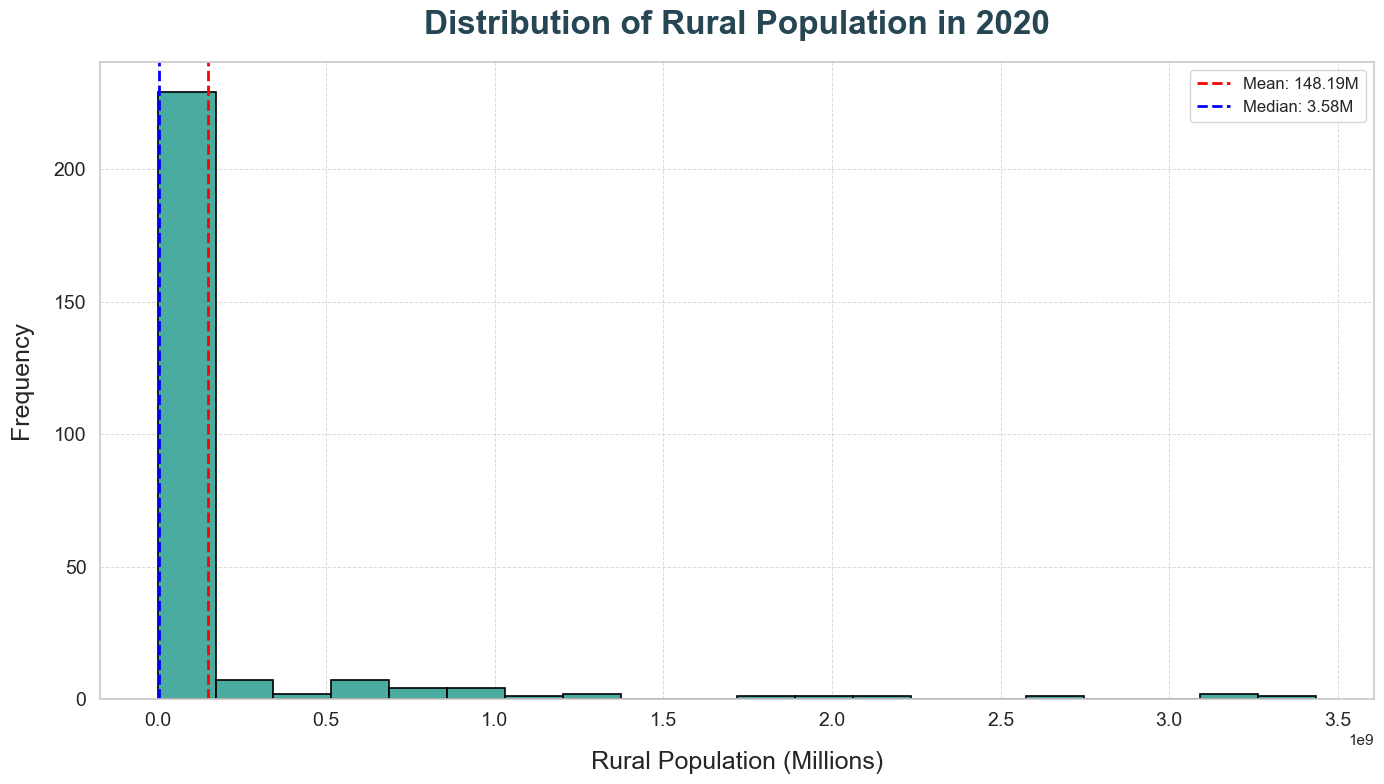

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_rural_population_distribution(data, year):
    """
    Visualizes the distribution of rural population for a specific year with a polished, professional look.

    Args:
    - data: DataFrame containing rural population data.
    - year: Year for which the distribution is to be visualized (e.g., '2020').
    """
    
    # Drop missing values for the selected year
    population_data = data[year].dropna()

    # Set style for a clean, professional appearance
    sns.set(style="whitegrid")

    # Create a figure with a larger size for better readability
    plt.figure(figsize=(14, 8))

    # Plot histogram with carefully chosen colors for a professional look
    sns.histplot(population_data, bins=20, color='#2a9d8f', edgecolor='black', linewidth=1.2, alpha=0.85)

    # Add title and labels with enhanced font sizes
    plt.title(f'Distribution of Rural Population in {year}', fontsize=24, weight='bold', color='#264653', pad=20)
    plt.xlabel('Rural Population (Millions)', fontsize=18, labelpad=15)
    plt.ylabel('Frequency', fontsize=18, labelpad=15)

    # Customize ticks for better clarity
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Display grid with a lighter color for a more refined look
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Add descriptive text annotations for clarity (e.g., mean, median)
    mean_pop = population_data.mean()
    median_pop = population_data.median()
    plt.axvline(mean_pop, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_pop/1e6:.2f}M')
    plt.axvline(median_pop, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_pop/1e6:.2f}M')

    # Display the legend in the upper right corner
    plt.legend(fontsize=12, loc='upper right')

    # Tidy up the layout for a polished finish
    plt.tight_layout()

    # Save the figure with high resolution
    plt.show()

# Call the function to visualize the plot
visualize_rural_population_distribution(data, '2020')


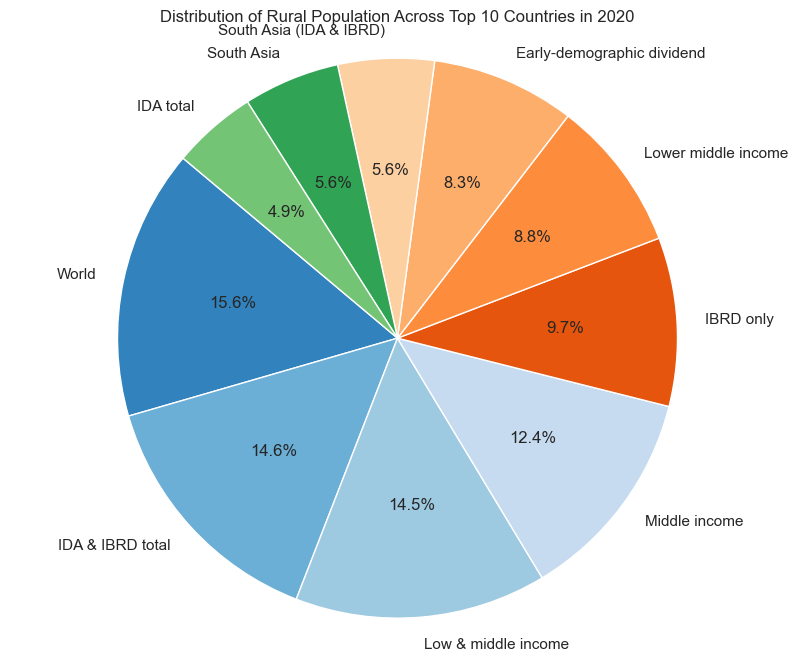

In [7]:

def visualize_top_10_countries_rural_population_2020(data):
    """
    Visualizes the distribution of rural population across the top 10 countries in 2020 using a pie chart.

    Args:
    - data: DataFrame containing rural population data for different countries and years.
    """

    # Get rural population values for the year 2020
    rural_population_2020 = data[['Country Name', '2020']].dropna()

    # Sort countries by rural population in descending order
    rural_population_2020_sorted = rural_population_2020.sort_values(by='2020', ascending=False)

    # Extract top 10 countries with the highest rural population in 2020
    top_10_countries_2020 = rural_population_2020_sorted.head(10)

    # Define a color palette for the pie chart
    colors = plt.cm.tab20c.colors  # Choosing a color palette from matplotlib

    # Plot pie chart for distribution of rural population across top 10 countries in 2020
    plt.figure(figsize=(10, 8))
    plt.pie(top_10_countries_2020['2020'], labels=top_10_countries_2020['Country Name'], autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('Distribution of Rural Population Across Top 10 Countries in 2020')
    plt.axis('equal') 
    plt.savefig('pie_chart.png')  
    plt.show()

visualize_top_10_countries_rural_population_2020(data)

C:\Users\sridh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


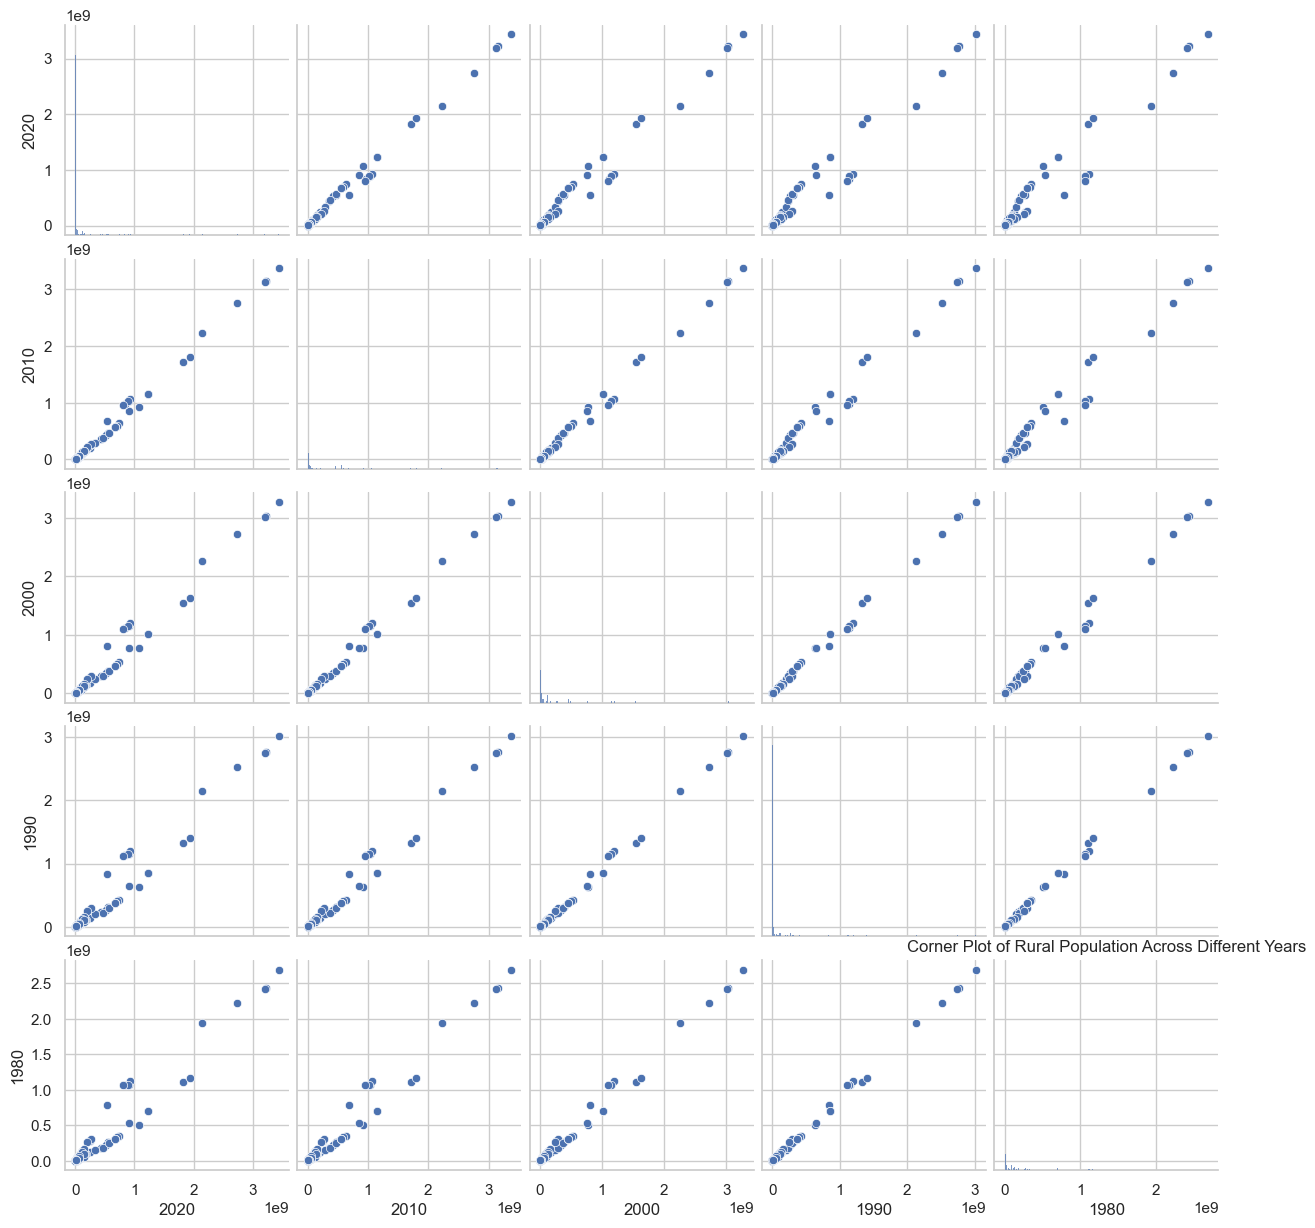

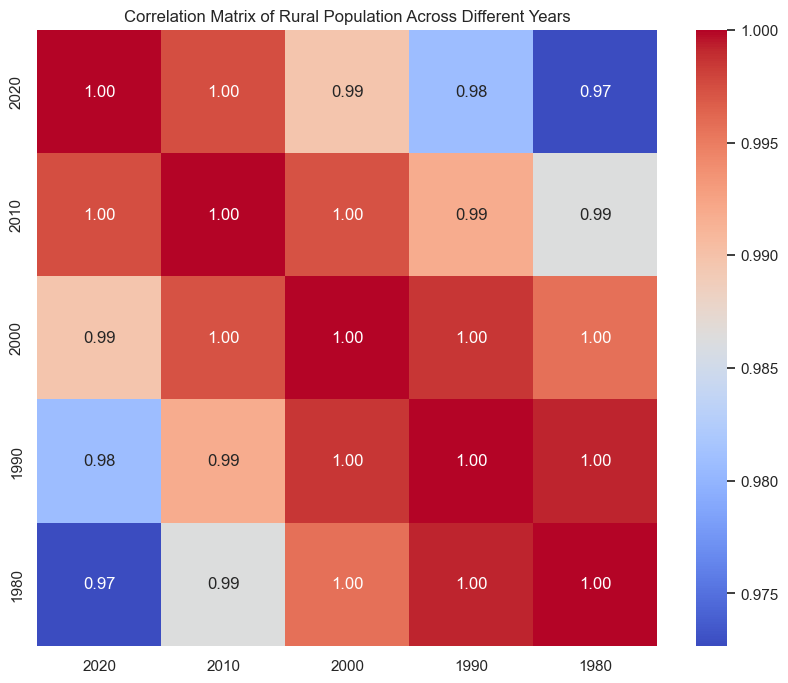

In [8]:
def visualize_corner_plot_rural_population(data, numerical_columns):
    """
    Visualizes the relationships between rural population across different years using a corner plot.

    Args:
    - data: DataFrame containing rural population data for different years.
    - numerical_columns: List of numerical columns (years) to include in the corner plot.
    """

    # Filter the data for the numerical columns
    numerical_data = data[numerical_columns].dropna()

    # Create corner plot
    sns.pairplot(numerical_data)
    plt.title('Corner Plot of Rural Population Across Different Years')
    plt.savefig('corner_plot2.png')  # Save the plot as evidence
    plt.show()
    # Calculate correlation matrix
    correlation_matrix = numerical_data.corr()

    # Visualize correlation matrix using heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Rural Population Across Different Years')
    plt.savefig('correlation_matrix.png') 
    plt.show()

visualize_corner_plot_rural_population(data, ['2020', '2010', '2000', '1990', '1980'])
   